In [1]:
cd ..

/home/marcos/Proyectos/Python/KPMG/NERTest


In [2]:
import os

import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from src.detector import extract

I1017 17:34:16.555156 140299843835712 file_utils.py:39] PyTorch version 1.6.0 available.
/home/marcos/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/marcos/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/marcos/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

--- Model Albert for NER ---
--- Albert for QA ---


/home/marcos/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
text = "BSO by Hans Zimmer is awesome. I give this movie five stars just because of the music."
extract(text)

Evaluating: 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]


([('BSO', 'B-SONG'),
  ('by', 'I-SONG'),
  ('Hans', 'I-SONG'),
  ('Zimmer', 'I-SONG'),
  ('is', 'O'),
  ('awesome', 'O'),
  ('I', 'O'),
  ('give', 'O'),
  ('this', 'O'),
  ('movie', 'O'),
  ('five', 'B-RATINGS_AVERAGE'),
  ('stars', 'O'),
  ('just', 'O'),
  ('because', 'O'),
  ('of', 'O'),
  ('the', 'O'),
  ('music', 'O')],
 None)

In [4]:
text = "Leonard Cohen songs in this movie are awesome"
extract(text)

Evaluating: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


([('Leonard', 'B-SONG'),
  ('Cohen', 'I-SONG'),
  ('songs', 'I-SONG'),
  ('in', 'O'),
  ('this', 'O'),
  ('movie', 'O'),
  ('are', 'O'),
  ('awesome', 'O')],
 None)

In [3]:
with open("data/engtest.txt", "r") as f:
    engtest = f.read()

In [4]:
docs = engtest.split("\n\n")

##### To save
- 2 -> Names lowcase 
- 4 -> Character or Title
- 20 -> the 2000's
- 23 -> Erros/Outliers

##### To do
- since in dates

In [5]:
i = 23
print(docs[i])

who	O
directed	B-DIRECTOR
the	O
film	O
pulp	B-TITLE
fiction	I-TITLE
that	O
starred	O
john	B-ACTOR
travolta	I-ACTOR


In [6]:
words_doc = [line.split("\t")[0] for line in docs[i].split("\n")]
print(words_doc)

['who', 'directed', 'the', 'film', 'pulp', 'fiction', 'that', 'starred', 'john', 'travolta']


In [7]:
extract(" ".join(words_doc))

Evaluating: 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]


([('who', 'O'),
  ('directed', 'O'),
  ('the', 'O'),
  ('film', 'O'),
  ('pulp', 'B-TITLE'),
  ('fiction', 'I-TITLE'),
  ('that', 'O'),
  ('starred', 'O'),
  ('john', 'I-ACTOR'),
  ('travolta', 'I-ACTOR')],
       original_title  year         genre           director  \
 28381   Pulp Fiction  1994  Crime, Drama  Quentin Tarantino   
 
                                                   actors  \
 28381  Tim Roth, Amanda Plummer, Laura Lovelace, John...   
 
                                              description  
 28381  The lives of two mob hitmen, a boxer, a gangst...  )

##### Metrics

In [8]:
with open("data/labels.txt", "r") as f:
    labels = f.read().split()
label_map = {i: label for i, label in enumerate(labels)}
reversed_label_map = {label: i for i, label in enumerate(labels)}

In [19]:
label_map

{0: 'B-REVIEW',
 1: 'B-AWARD',
 2: 'B-DIRECTOR',
 3: 'B-RATING',
 4: 'B-RATINGS_AVERAGE',
 5: 'B-GENRE',
 6: 'B-CHARACTER',
 7: 'B-QUOTE',
 8: 'B-ORIGIN',
 9: 'B-SONG',
 10: 'B-ACTOR',
 11: 'B-TITLE',
 12: 'B-PLOT',
 13: 'B-RELATIONSHIP',
 14: 'B-YEAR',
 15: 'B-TRAILER',
 16: 'I-REVIEW',
 17: 'I-AWARD',
 18: 'I-DIRECTOR',
 19: 'I-RATING',
 20: 'I-RATINGS_AVERAGE',
 21: 'I-GENRE',
 22: 'I-CHARACTER',
 23: 'I-QUOTE',
 24: 'I-ORIGIN',
 25: 'I-SONG',
 26: 'I-ACTOR',
 27: 'I-TITLE',
 28: 'I-PLOT',
 29: 'I-RELATIONSHIP',
 30: 'I-YEAR',
 31: 'I-TRAILER',
 32: 'O'}

In [9]:
doc = docs[0]
words_doc = [line.split("\t")[0] for line in doc.split("\n")]
real_ents = [line.split("\t")[1] for line in doc.split("\n")]
real_idxs = [reversed_label_map[real_ent] for real_ent in real_ents]

In [18]:
real_ents, real_idxs

(['O', 'O', 'O', 'O', 'B-GENRE', 'I-GENRE', 'O', 'B-YEAR', 'I-YEAR'],
 [32, 32, 32, 32, 5, 21, 32, 14, 30])

In [17]:
pred_ents, pred_idxs

(['O', 'O', 'O', 'O', 'B-GENRE', 'I-GENRE', 'O', 'O', 'O'],
 [32, 32, 32, 32, 5, 21, 32, 32, 32])

In [10]:
result, _ = extract(" ".join(words_doc))

pred_ents = [ent[1] for ent in result]
pred_idxs = [reversed_label_map[ent] for ent in pred_ents]

Evaluating: 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]


In [11]:
print(f"Precission: {precision_score(real_idxs, pred_idxs, average='micro')}")
print(f"Accuracy: {accuracy_score(real_idxs, pred_idxs)}")
print(f"Recall: {recall_score(real_idxs, pred_idxs, average='micro')}")
print(f"f1-score: {f1_score(real_idxs, pred_idxs, average='micro')}")
      
print(classification_report(real_idxs, pred_idxs))

Precission: 0.7777777777777778
Accuracy: 0.7777777777777778
Recall: 0.7777777777777778
f1-score: 0.7777777777777778
              precision    recall  f1-score   support

           5       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          21       1.00      1.00      1.00         1
          30       0.00      0.00      0.00         1
          32       0.71      1.00      0.83         5

    accuracy                           0.78         9
   macro avg       0.54      0.60      0.57         9
weighted avg       0.62      0.78      0.69         9



/home/marcos/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
list(set(real_idxs + pred_idxs))

[32, 5, 14, 21, 30]

In [21]:
columns = [labels[i] for i in list(set(real_idxs + pred_idxs))]
columns.sort()

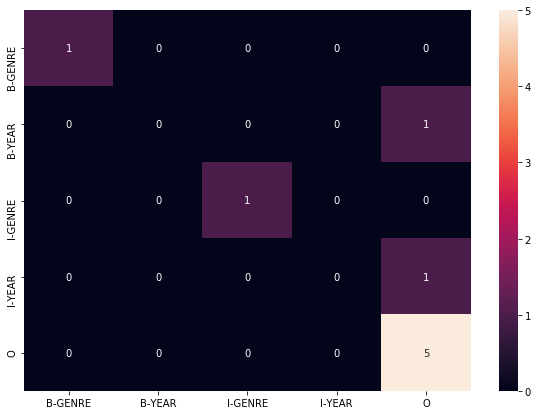

In [22]:
df_cm = pd.DataFrame(confusion_matrix(real_idxs, pred_idxs), index=columns,
                  columns=columns)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)